In [1]:
import datetime

from IPython.display import display, Markdown, Latex

from analyse import deviation, pivot_sr
from product import Option
from strategy import *
from euronext import Page, Ticker
from graph import Graph, display_week_summary

p = Page(ticker=Ticker.CAC2PX, params='Class_type=0&Class_symbol=&Class_exchange=&ex=&ps=999&md=12-2018')
p.fetch()
(call, put) = p.scrap_options(multiplier=10)
var = deviation(close=4797, volatility=23.13, period=5, precision=0)
var = deviation(close=4806, volatility=20.90, period=3, precision=0)
sd = [var['1']['min'], var['1']['max']]
g=Graph(var['2']['min'], var['2']['max'], 1, sd)

# Last Week values
H = 5115
B = 4760
C = 4813
psr = pivot_sr(H, B, C)
display_week_summary(datetime.datetime.now(), psr, var)

### Semaine 50
- 1 $\sigma$ [4696 - 4916]
- 2 $\sigma$ [4586 - 5026]
- Pivot 4896
- SR1 [5032 - 4677]
- SR2 [5251 - 4541]
- SR3 [5387 - 4322]
    

In [ ]:

s = Strategy('S47-CAC40-straddle').add(put[4900], 'short', 2).add(call[5000], 'short', 2)
g.profit(s, 'long')
g.display_summary(s)
print('pv-max: {} €'.format(max(s.payoff(g.sT, 'long'))))

s = Strategy('S47-CAC40-straddle').add(put[4925], 'short', 1).add(call[5000], 'short', 1)
g.profit(s, 'long')
g.display_summary(s)
print('pv-max: {} €'.format(max(s.payoff(g.sT, 'long'))))

b11 = Strategy('S47-CAC40-butterfly11').add(put[5000], 'short', 1).add(call[5000], 'short', 1)
b12 = Strategy('S47-CAC40-butterfly12').add(put[5000], 'short', 1).add(call[5000], 'short', 2)
b21 = Strategy('S47-CAC40-butterfly21').add(put[5000], 'short', 2).add(call[5000], 'short', 1)
g.profit(b11, 'long')
g.display_summary(b11)
print('pv-max: {} €'.format(max(b11.payoff(g.sT, 'long'))))
g.profit(b12, 'long')
g.display_summary(b12)
print('pv-max: {} €'.format(max(b12.payoff(g.sT, 'long'))))
g.profit(b21, 'long')
g.display_summary(b21)
print('pv-max: {} €'.format(max(b21.payoff(g.sT, 'long'))))
g.compare(call[4900], 'long', call[4850], 'long')

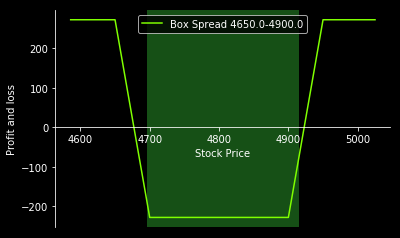

Cost-BoxSpread : -772.00€


Category,strike,direction,Quantity,Cost,Premium
Call,4650,short,1,-1761,-176.1
Call,4700,long,1,1360,136
Put,4950,short,1,-1279,-127.9
Put,4900,long,1,908,90.8


In [4]:
bspread = BoxSpread(call[4700], call[4650], put[4900], put[4950])
bspread = BoxSpread(call[4650], call[4700], put[4950], put[4900])
g.profit_strategy(bspread)
print('Cost-BoxSpread : {:0.02f}€'.format(bspread.cost()))
g.display_summary(bspread)

Category,strike,direction,Quantity,Cost,Premium
Call,4650,short,1,-1761,-176.1
Call,4700,long,1,1360,136
Put,4950,short,1,-1279,-127.9
Put,4900,long,1,908,90.8


Category,strike,direction,Quantity,Cost,Premium
Call,4650,long,1,1821,182.1
Call,4700,short,1,-1300,-130
Put,4950,long,1,1339,133.9
Put,4900,short,1,-858,-85.8


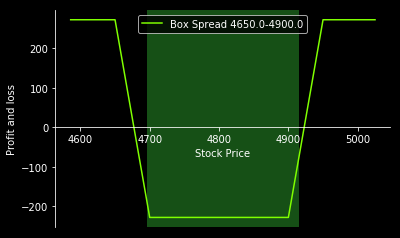

Cost-BoxSpread : -772.00€


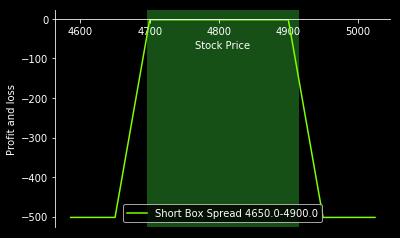

Cost-BoxSpread : 1002.00€


In [3]:
bspread = BoxSpread(call[4650], call[4700], put[4950], put[4900])
g.display_summary(bspread)
bspreadi = bspread.short();
g.display_summary(bspreadi)
bspreadi.options
g.profit_strategy(bspread)
print('Cost-BoxSpread : {:0.02f}€'.format(bspread.cost()))
g.profit_strategy(bspreadi)
print('Cost-BoxSpread : {:0.02f}€'.format(bspreadi.cost()))

In [ ]:
g.profit_rainbow(call.values(), 'short', title='Call Rainbow')

In [ ]:
bss = BoxSpread.explorator(call.values(), put.values(), spread=50, gap=100)
g.profit_rainbow(bss, 'long', title='BoxSpread Rainbow')

In [ ]:
bss = BoxSpread.explorator(call.values(), put.values(), spread=50, gap=75)
g.profit_rainbow(bss, 'long', title='BoxSpread Rainbow')

In [ ]:
g.profit_rainbow(call.values(), 'short', title='BoxSpread Rainbow')

In [ ]:
s = (Strategy('S49-CAC40')
     #.add(Option(cat='Call', strike=5075, vente=2.8, multiplier=10), 'short', 1)
     #.add(Option(cat='Call', strike=5050, achat=0.5, multiplier=10), 'long', 1)
     .add(put[4625], 'long', 1)
     .add(put[4600], 'short', 1)
     .add(put[4700], 'long', 1)
     .add(put[4725], 'short', 1)
    )
#s = bss[9]
g.profit(s, 'long')
g.display_summary(s)
print('pv-max: {} €'.format(max(s.payoff(g.sT, 'long'))))
print('pv-min: {} €'.format(min(s.payoff(g.sT, 'long'))))


In [ ]:
s = (Strategy('S49-CAC40')
     .add(call[4850], 'short', 1)
     .add(call[4750], 'long', 1)
     #.add(call[4900], 'short', 1)
     #.add(call[4925], 'long', 1)
     #.add(Option(cat='Call', strike=5075, vente=2.8, multiplier=10), 'short', 1)
     #.add(Option(cat='Call', strike=5050, achat=0.5, multiplier=10), 'long', 1)
     #.add(call[5050], 'long', 1)
    )
g.profit(s, 'long')
g.display_summary(s)
print('pv-max: {} €'.format(max(s.payoff(g.sT, 'long'))))
print('pv-min: {} €'.format(min(s.payoff(g.sT, 'long'))))

In [ ]:
s = (Strategy('S49-CAC40')
     #.add(call[4900], 'long', 1)
     #.add(put[4850], 'short', 1)
     .add(put[4850], 'short', 1)
     #.add(call[4900], 'short', 1)
     #.add(put[4900], 'long', 1)
     #.add(call[5050], 'long', 1)
     #.add(Option(cat='Call', strike=5075, vente=2.8, multiplier=10), 'short', 1)
     #.add(Option(cat='Call', strike=5050, achat=0.5, multiplier=10), 'long', 1)
     #.add(call[5050], 'long', 1)
    )
g.profit(s, 'long')
g.display_summary(s)
print('pv-max: {} €'.format(max(s.payoff(g.sT, 'long'))))
print('pv-min: {} €'.format(min(s.payoff(g.sT, 'long'))))
import numpy as np
v = s.payoff(np.array(g.sdeviation), 'long')

for s, pv in zip(g.sdeviation, v):
    print('{} -> {}'.format(s, pv))

In [ ]:
s = (Strategy('S49-CAC40')
     #.add(call[4900], 'long', 1)
     #.add(put[4850], 'short', 1)
     .add(put[4850], 'short', 1)
     #.add(call[4900], 'short', 1)
     #.add(put[4900], 'long', 1)
     #.add(call[5050], 'long', 1)
     #.add(Option(cat='Call', strike=5075, vente=2.8, multiplier=10), 'short', 1)
     #.add(Option(cat='Call', strike=5050, achat=0.5, multiplier=10), 'long', 1)
     #.add(call[5050], 'long', 1)
    )
g.profit(s, 'long')
g.display_summary(s)
print('pv-max: {} €'.format(max(s.payoff(g.sT, 'long'))))
print('pv-min: {} €'.format(min(s.payoff(g.sT, 'long'))))
import numpy as np
v = s.payoff(np.array(g.sdeviation), 'long')

for s, pv in zip(g.sdeviation, v):
    print('{} -> {}'.format(s, pv))

In [ ]:
deviation(close=4963, volatility=22, period=3, precision=0)

In [ ]:
p2 = Page(ticker=Ticker.CAC1PX, params='Class_type=0&Class_symbol=&Class_exchange=&ex=&ps=999&md=12-2018')
p2.fetch()
(call2, put2) = p2.scrap_options(multiplier=10)
(call2, put2)

In [ ]:
# Buy 1 ITM Call
# Sell 2 ATM Calls


# Buy 1 ITM Put
# Sell 2 ATM Puts
s = (Strategy('S49-CAC40')
     .add(put[4900], 'long', 1)
     .add(put[4850], 'short', 2)
    )
g.profit(s, 'long')
g.display_summary(s)
print('pv-max: {} €'.format(max(s.payoff(g.sT, 'long'))))
print('pv-min: {} €'.format(min(s.payoff(g.sT, 'long'))))
import numpy as np
v = s.payoff(np.array(g.sdeviation), 'long')

for s, pv in zip(g.sdeviation, v):
    print('{} -> {}'.format(s, pv))

In [ ]:
print(p._url)